In [18]:
import time
import numpy as np

from astropy.time import Time   # Astropy 4.1rc1 is used

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from orbitdeterminator.doppler.utils.utils import *
from orbitdeterminator.doppler.utils.utils_aux import *
from orbitdeterminator.doppler.utils.utils_vis import *

In [32]:
def doppler_shift(x_sat:np.ndarray, x_obs:np.ndarray, f_ref:float, c:float):
    """ Get Doppler shift value for the given satellite and observer vectors.
        Vectorized.
    
    Args:
        x_sat (np.ndarray): satellite location (pos, vel).
        x_obs (np.ndarray): observer location (pos, vel).
        f_ref (float): reference frequency.
        c (float): propagation speed.
    
    Returns:
        df (np.ndarray): frequency shift relative to reference frequenct df
    """

    _, rv = range_range_rate(x_sat, x_obs)
    df = rv / c * f_ref

    return df

In [42]:
def relativistic_doppler_shift(x_sat:np.ndarray, x_obs:np.ndarray, f_ref:float, c:float):
    """ Get Doppler shift value for the given satellite and observer vectors.
        Vectorized.
    
    Args:
        x_sat (np.ndarray): satellite location (pos, vel).
        x_obs (np.ndarray): observer location (pos, vel).
        f_ref (float): reference frequency.
        c (float): propagation speed.
    
    Returns:
        df (np.ndarray): frequency shift relative to reference frequenct df
    """
   
    _, rv = range_range_rate(x_sat, x_obs)
    #beta = v/c
    beta = rv/c
    #here gamma is Lorentz Factor = 1/((1-(beta)**2)**0.5)
    gamma = 1/((1-beta**2)**0.5)
    #considering source is in circular motion around the receiver
    rdf = f_ref/gamma
    return f_ref-rdf

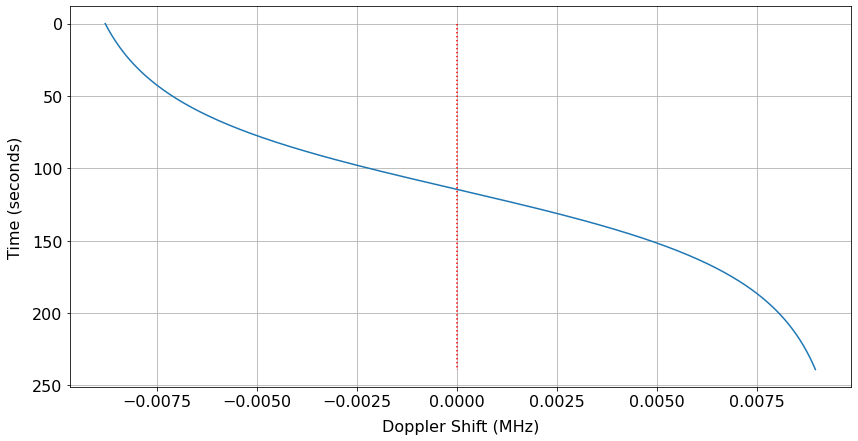

In [40]:
%matplotlib inline

np.random.seed(100)
np.set_printoptions(precision=2)

x_0, t_sec, x_sat_orbdyn_stm, x_obs_multiple, f_ref = get_example_scenario(id=3, frame='teme')

# Define measurements
r_1, rr_1 = range_range_rate(x_sat_orbdyn_stm, x_obs_multiple[:,:,0])
r_2, rr_2 = range_range_rate(x_sat_orbdyn_stm, x_obs_multiple[:,:,1])
r_3, rr_3 = range_range_rate(x_sat_orbdyn_stm, x_obs_multiple[:,:,2])
z_rr_1 = np.expand_dims(rr_1, axis=0)       # Range rate measurements
_, z_rr_multiple = range_range_rate(x_sat_orbdyn_stm, x_obs_multiple)
z_x_sat = x_sat_orbdyn_stm                  # Full state measurements

#fig1 = plot_example_3d(x_sat_orbdyn_stm, x_obs_multiple)

doppler = doppler_shift(x_sat_orbdyn_stm, x_obs_multiple, f_ref, c=C)

font = {'size': 16}
matplotlib.rc('font', **font)

fig = fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Doppler Shift (MHz)", fontsize=16, labelpad=10)
ax1.set_ylabel("Time (seconds)", fontsize=16, labelpad=10)
ax1.grid(":")

ax1.plot(doppler[0,:], t_sec)
ax1.plot(np.zeros(t_sec.shape), t_sec, color='r', linestyle=':')
ax1.invert_yaxis()


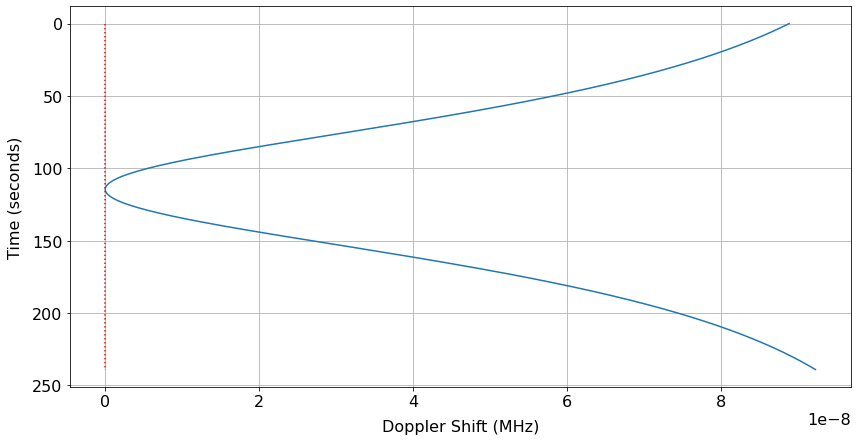

In [43]:
%matplotlib inline

np.random.seed(100)
np.set_printoptions(precision=2)

x_0, t_sec, x_sat_orbdyn_stm, x_obs_multiple, f_ref = get_example_scenario(id=3, frame='teme')

# Define measurements
r_1, rr_1 = range_range_rate(x_sat_orbdyn_stm, x_obs_multiple[:,:,0])
r_2, rr_2 = range_range_rate(x_sat_orbdyn_stm, x_obs_multiple[:,:,1])
r_3, rr_3 = range_range_rate(x_sat_orbdyn_stm, x_obs_multiple[:,:,2])
z_rr_1 = np.expand_dims(rr_1, axis=0)       # Range rate measurements
_, z_rr_multiple = range_range_rate(x_sat_orbdyn_stm, x_obs_multiple)
z_x_sat = x_sat_orbdyn_stm                  # Full state measurements

#fig1 = plot_example_3d(x_sat_orbdyn_stm, x_obs_multiple)

doppler = relativistic_doppler_shift(x_sat_orbdyn_stm, x_obs_multiple, f_ref, c=C)

font = {'size': 16}
matplotlib.rc('font', **font)

fig = fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Doppler Shift (MHz)", fontsize=16, labelpad=10)
ax1.set_ylabel("Time (seconds)", fontsize=16, labelpad=10)
ax1.grid(":")

ax1.plot(doppler[0,:], t_sec)
ax1.plot(np.zeros(t_sec.shape), t_sec, color='r', linestyle=':')
ax1.invert_yaxis()
